##### Imports & load functions

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [3]:
df1 = pd.read_csv("../test/DeepRM_2/anomalyrate_0.10_sd/test_metrics.csv")
df2 = pd.read_csv("../test/DeepRM_ECO_3000/anomalyrate_0.10_sd/test_metrics.csv")

In [4]:
df1_RM2 = df1[df1['Test Type'] == 'DeepRM_2']
df1_SJF = df1[df1['Test Type'] == 'SJF']

In [5]:
df2_RME = df2[df2['Test Type'] == 'DeepRM_ECO']
df2_SJF = df2[df2['Test Type'] == 'SJF']

In [6]:
average_slowdown1_RM2 = df1_RM2.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown1_RM2 = average_slowdown1_RM2.reset_index()

average_slowdown1_SJF = df1_SJF.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown1_SJF = average_slowdown1_SJF.reset_index()

In [7]:
average_slowdown2_RME = df2_RME.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown2_RME = average_slowdown2_RME.reset_index()

average_slowdown2_SJF = df2_SJF.groupby(["Workload", "Anomaly rate"])["Average Slowdown"].mean()
average_slowdown2_SJF = average_slowdown2_SJF.reset_index()

In [8]:
average_slowdown1_RM2.head()

,Workload,Anomaly rate,Average Slowdown
0,10,0.1,15.620301
1,20,0.1,12.926120
2,30,0.1,7.730851
3,40,0.1,9.583340
4,50,0.1,12.828341


In [9]:
average_slowdown2_RME.head()

,Workload,Anomaly rate,Average Slowdown
0,10,0.1,6.703008
1,20,0.1,3.510222
2,30,0.1,12.271540
3,40,0.1,14.033654
4,50,0.1,11.547393


In [10]:
workload1_RM2 = average_slowdown1_RM2['Workload'].unique()
workload1_RM2.sort()
slowdown1_RM2 = [df1_RM2[df1_RM2['Workload'] == workload]['Average Slowdown'].mean() for workload in workload1_RM2]

workload1_SJF = df1_SJF['Workload'].unique()
workload1_SJF.sort()
slowdown1_SJF = [df1_SJF[df1_SJF['Workload'] == workload]['Average Slowdown'].mean() for workload in workload1_SJF]

workload2_RME = average_slowdown2_RME['Workload'].unique()
workload2_RME.sort()
slowdown2_RME = [df2_RME[df2_RME['Workload'] == workload]['Average Slowdown'].mean() for workload in workload2_RME]

workload2_SJF = df2_SJF['Workload'].unique()
workload2_SJF.sort()
slowdown2_SJF = [df2_SJF[df2_SJF['Workload'] == workload]['Average Slowdown'].mean() for workload in workload2_SJF]

df_RM2 = pd.DataFrame({'Workload': workload1_RM2, 'Average Slowdown': slowdown1_RM2})
df_RME = pd.DataFrame({'Workload': workload2_RME, 'Average Slowdown': slowdown2_RME})
df_SJF = pd.DataFrame({'Workload': workload2_SJF, 'Average Slowdown': slowdown2_SJF}) 

<module 'matplotlib.pyplot' from '/home/terhard/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

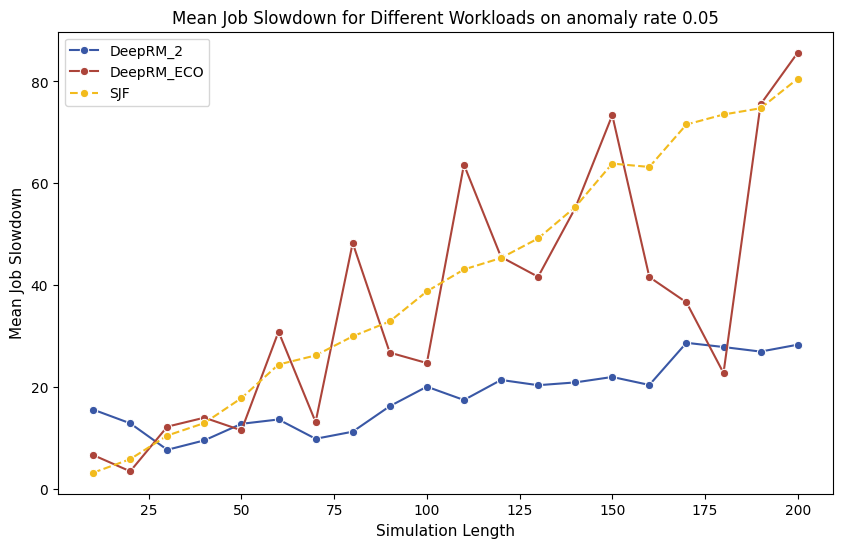

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_RM2, x='Workload', y='Average Slowdown', label='DeepRM_2', color='#3957a5', marker='o')
sns.lineplot(data=df_RME, x='Workload', y='Average Slowdown', label='DeepRM_ECO', color='#ac443a', marker='o')
sns.lineplot(data=df_SJF, x='Workload', y='Average Slowdown', label='SJF', color='#f2bb1d', marker='o', linestyle="--")

plt.title('Mean Job Slowdown for Different Workloads on anomaly rate 0.05')
plt.xlabel('Simulation Length', fontsize=11)
plt.ylabel('Mean Job Slowdown', fontsize=11)
plt.legend()
plt

In [13]:
slowdown1_RM2

[15.620300751879702,
 12.926120337995338,
 7.73085076335026,
 9.583340479903812,
 12.82834057890012,
 13.679654066415287,
 9.893226810776438,
 11.282741355599502,
 16.28546430714144,
 20.112884499446874,
 17.49855317749364,
 21.432464855880582,
 20.401461107436972,
 20.946573000657562,
 22.016740068379672,
 20.45219144720664,
 28.718453969884546,
 27.891326732434713,
 26.9975884728109,
 28.350480510018166]

In [14]:
slowdown2_RME

[6.7030075187969915,
 3.510221861471861,
 12.271539580588492,
 14.033654248652493,
 11.547393421036517,
 30.90782509514841,
 13.178326866750506,
 48.29375306193565,
 26.79536929770686,
 24.746514633377704,
 63.663459401557006,
 45.56096786601296,
 41.66728468115445,
 55.130675686875236,
 73.3671582691504,
 41.61356447783881,
 36.65291339835035,
 22.79217655662496,
 75.50344545984521,
 85.62387758119799]

In [22]:
mean_slowdown_RM2 = sum(slowdown1_RM2) / len(slowdown1_RM2)
print(mean_slowdown_RM2)

18.23243786468061


In [24]:
mean_slowdown_RME = sum(slowdown2_RME) / len(slowdown2_RME)
print(mean_slowdown_RME)

36.67815644820365


In [21]:
mean_slowdown_SJF = sum(slowdown2_SJF) / len(slowdown2_SJF)
print(mean_slowdown_SJF)

41.16552418425137


##### Perform Mann-Whitney U test for significance

In [35]:
u_statistic_RM2_RME, p_value_RM2_RME = mannwhitneyu(slowdown1_RM2, slowdown2_RME, alternative='two-sided')
print(f"Mann-Whitney U statistic (RM_2 vs RM_ECO): {u_statistic_RM2_RME}")
print(f"P-value (RM_2 vs RM_ECO): {p_value_RM2_RME}")

# Perform the Mann-Whitney U test for RM_2 vs SJF
u_statistic_RM2_SJF, p_value_RM2_SJF = mannwhitneyu(slowdown1_RM2, slowdown2_SJF, alternative='two-sided')
print(f"Mann-Whitney U statistic (RM_2 vs SJF): {u_statistic_RM2_SJF}")
print(f"P-value (RM_2 vs SJF): {p_value_RM2_SJF}")

Mann-Whitney U statistic (RM_2 vs RM_ECO): 111.0
P-value (RM_2 vs RM_ECO): 0.016668798824275466
Mann-Whitney U statistic (RM_2 vs SJF): 89.0
P-value (RM_2 vs SJF): 0.0027986021909070804


In [37]:
def rank_biserial_correlation(u_stat, n1, n2):
    return 1 - (2 * u_stat) / (n1 * n2)

rbc_RM2_RME = rank_biserial_correlation(u_statistic_RM2_RME, len(slowdown1_RM2), len(slowdown2_RME))
rbc_RM2_SJF = rank_biserial_correlation(u_statistic_RM2_SJF, len(slowdown1_RM2), len(slowdown2_SJF))

print(f"Rank-Biserial Correlation (RM_2 vs RM_ECO): {rbc_RM2_RME}")
print(f"Rank-Biserial Correlation (RM_2 vs SJF): {rbc_RM2_SJF}")

Rank-Biserial Correlation (RM_2 vs RM_ECO): 0.44499999999999995
Rank-Biserial Correlation (RM_2 vs SJF): 0.5549999999999999
